In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
classes = ['baroque', 'bauhaus', 'gothic', 'islamic', 'modernist', 'neoclassical', 'renaissance', 'romanesque', 'tudor', 'victorian']
path = Path('data')

In [7]:
#np.random.seed(0)
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#                                  ds_tfms=get_transforms(), size=224,
#                                  num_workers=4).normalize(imagenet_stats)

In [ ]:
np.random.seed(0)
data = ImageDataBunch.from_csv(path, labels='cleaned.csv').normalize(imagenet_stats)

In [8]:
data.classes

['baroque',
 'bauhaus',
 'gothic',
 'islamic',
 'modernist',
 'neoclassical',
 'renaissance',
 'romanesque',
 'tudor',
 'victorian']

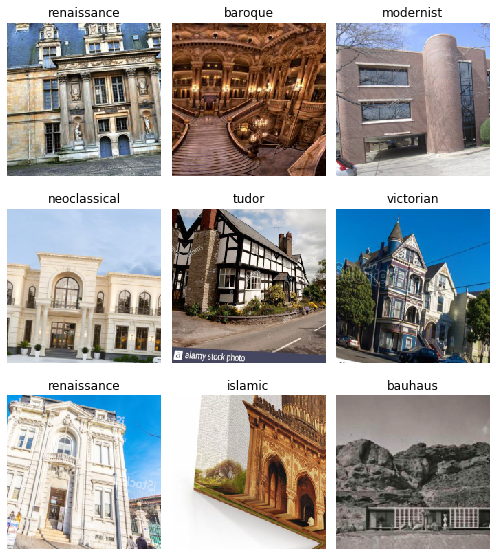

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baroque',
  'bauhaus',
  'gothic',
  'islamic',
  'modernist',
  'neoclassical',
  'renaissance',
  'romanesque',
  'tudor',
  'victorian'],
 10,
 3101,
 775)

In [53]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.387521,1.269379,0.386968,00:31
1,1.747398,1.198582,0.378989,00:29
2,1.377438,1.073720,0.356383,00:30
3,1.128855,1.051682,0.332447,00:29


In [13]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3101 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tudor,tudor,tudor,tudor,tudor
Path: data;

Valid: LabelList (775 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
modernist,neoclassical,islamic,victorian,modernist
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [55]:
learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


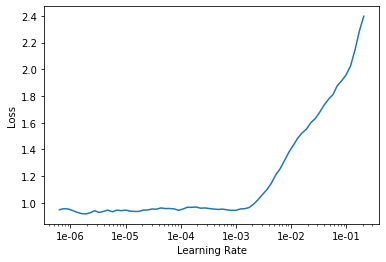

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.941515,1.033688,0.332447,00:36
1,0.864877,0.983172,0.309840,00:36
2,0.675866,0.964858,0.279255,00:36
3,0.523610,0.957748,0.285904,00:36


In [59]:
learn.save('stage-2')

In [30]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (3101 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tudor,tudor,tudor,tudor,tudor
Path: data;

Valid: LabelList (775 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
modernist,neoclassical,islamic,victorian,modernist
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

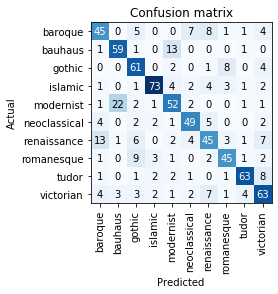

In [32]:
interp.plot_confusion_matrix()

In [33]:
from fastai.widgets import *

In [ ]:
#db = (ImageList.from_folder(path)
#               .split_none()
#               .label_from_folder()
#               .transform(get_transforms(), size=224)
#               .databunch()
#     )

In [63]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
               .split_none()
               .label_from_df()
               .transform(get_transforms(), size=224)
               .databunch()
     )

In [35]:
learn_clean = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_clean.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (3876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tudor,tudor,tudor,tudor,tudor
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [50]:
ds, idxs = DatasetFormatter().from_toplosses(learn_clean)

In [51]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [52]:
np.random.seed(0)
path = Path('data')
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(),
                               size=224).normalize(imagenet_stats)

In [7]:
#np.random.seed(0)
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#                                  ds_tfms=get_transforms(), size=224,
#                                  num_workers=4).normalize(imagenet_stats)

In [39]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [40]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [110]:
learn_cln.export()

In [111]:
defaults.device = torch.device('cpu')

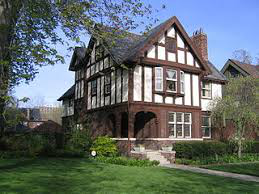

In [118]:
img = open_image(path/'tudor'/'00000042.jpg')
img

In [119]:
learn = load_learner(path)

In [120]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tudor